## Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The cleaned datafile

In [5]:
df = pd.read_csv('StudentsPerformance_Clean.csv')

In [6]:
df.head()

Unnamed: 0  gender race/ethnicity parental level of education  \
0           0  female        group B           bachelor's degree   
1           1  female        group C                some college   
2           2  female        group B             master's degree   
3           3    male        group A          associate's degree   
4           4    male        group C                some college   

          lunch test preparation course  math score  reading score  \
0      standard                    none          72             72   
1      standard               completed          69             90   
2      standard                    none          90             95   
3  free/reduced                    none          47             57   
4      standard                    none          76             78   

   writing score  race/ethnicity_map    ...      gender_map  total_score  \
0             74                   2    ...               1          218   
1             88                   3    ...               1          247   
2             93                   2    ...               1          278   
3             44                   1    ...               2          148   
4             75                   3    ...               2          229   

   pass/fail  percentage        grade math_passfail  reading_passfail  \
0       Pass   72.666667        First             1                 1   
1       Pass   82.333333  Distinction             1                 1   
2       Pass   92.666667  Distinction             1                 1   
3       Pass   49.333333       Second             1                 1   
4       Pass   76.333333        First             1                 1   

  writing_passfail  pass/fail_map  grade_map  
0                1              1          2  
1                1              1          1  
2                1              1          1  
3                1              1          3  
4                1              1          2  

[5 rows x 23 columns]

## Calculating Number of male and female

In [8]:
male = df[df['gender_map']==2]
print ('Number of Male: ',len(male))

Number of Male:  482


In [9]:
female = df[df['gender_map']==1]
print('Number of Female: ',len(female))

Number of Female:  518


## Calculating number of Passed students

In [11]:
passed = df[df['pass/fail_map']==1]
print('Number of Passed Students: ',len(passed))

Number of Passed Students:  949


## Calculating Number of Failed Students

In [14]:
failed = df[df['pass/fail_map']==0]
print('Number of Failed Students: ',len(failed))

Number of Failed Students:  51


## Calculating the number of male and female students who passed

In [18]:
passed_gender = passed['gender']
all_passed = passed_gender.value_counts()

In [19]:
all_passed

female    487
male      462
Name: gender, dtype: int64

## Displaying passed students according to gender

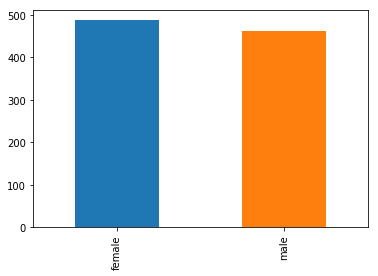

In [21]:
all_passed.plot.bar()

#### The bar graph displays a greater number of female students that pass. However due to the number of females is higher than the number of males, we can assume that there are similar number of students passed in both genders

## Checking if the level of education has any effect on the performance of the students

In [24]:
all_parents_level = df['parental level of education']
all_parents_level_no = all_parents_level.value_counts()
passed_students_parents_level = passed['parental level of education']
passed_students_parents_no = passed_students_parents_level.value_counts()

In [29]:
print('All Parents Education Level:\n',all_parents_level_no)

All Parents Education Level:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


In [32]:
print('Passes Student\'s Parent\'s education level:\n ',passed_students_parents_no)

Passes Student's Parent's education level:
  associate's degree    217
some college          216
high school           180
some high school      163
bachelor's degree     114
master's degree        59
Name: parental level of education, dtype: int64


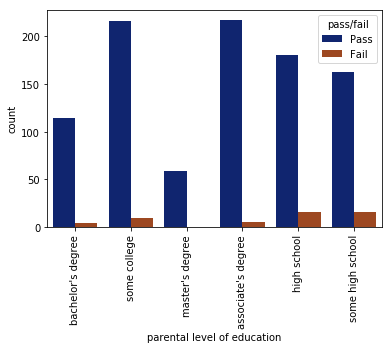

In [35]:
parents_education = sns.countplot(x='parental level of education', data = df, hue = 'pass/fail', palette = 'dark')
_ = plt.setp(parents_education.get_xticklabels(), rotation = 90)

#### Conclusion: From the above bar graph we can clearly see that parents who have good degrees themselves have children with better passing numbers

## Calculating education level of parents of students who passed or failed in maths

In [39]:
df['math_passfail'].value_counts()

1    960
0     40
Name: math_passfail, dtype: int64

#### Note: 1 represents Passed And 0 represents failed

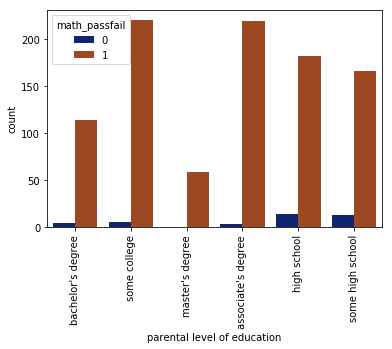

In [40]:
parents_education = sns.countplot(x='parental level of education', data = df, hue ='math_passfail', palette = 'dark')
_ = plt.setp(parents_education.get_xticklabels(), rotation = 90)

### Conclusion: From the above diagram we can see that parents with higher level of education have childred who failed less in exam

## Calculating education level of parents of students who passed or failed in reading

In [41]:
df['reading_passfail'].value_counts()

1    974
0     26
Name: reading_passfail, dtype: int64

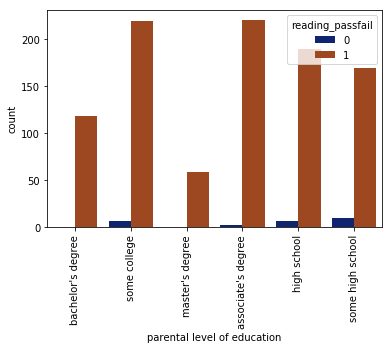

In [43]:
parents_education = sns.countplot(x='parental level of education', data = df, hue='reading_passfail', palette = 'dark')
_ = plt.setp(parents_education.get_xticklabels(), rotation = 90)

## Calculating education level of parents of students who passed or failed in writing

In [44]:
df['writing_passfail'].value_counts()

1    968
0     32
Name: writing_passfail, dtype: int64

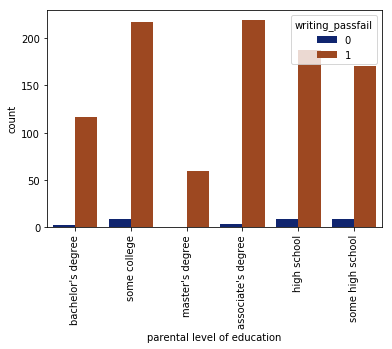

In [45]:
parents_education = sns.countplot(x='parental level of education',data = df, hue = 'writing_passfail',palette = 'dark', )
_ = plt.setp(parents_education.get_xticklabels(), rotation = 90)

#### Conclusion : From the above diagrams we can conclude that the students with parents with higher level of education failed less in the subjects

## Checking Grades of students

In [47]:
df['grade'].value_counts()

First          517
Second         234
Distinction    198
Fail            51
Name: grade, dtype: int64

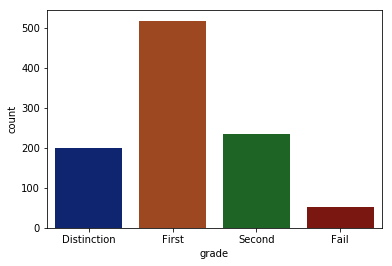

In [48]:
sns.countplot(x ="grade", data = df, order = ['Distinction','First','Second','Fail'], palette = 'dark')
plt.show()

#### Conclusion: From the above diagram we can assume that the majority of students got first division, followed by Second division and Distinction. the minority failed.

## Checking relationship of Parental level of education with grade

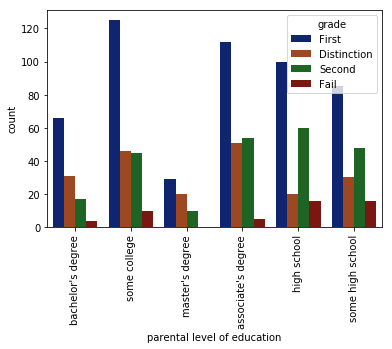

In [51]:
parental_edu = sns.countplot('parental level of education', data= df, hue = 'grade', palette = 'dark')
_ = plt.setp(parental_edu.get_xticklabels(), rotation=90)

#### Conclusion: The majority of students got First division no matter what their parent's education level was, however parents with higher education levels have children who got distinction while parents who have intermediate level of education ahve students who got second division in greater numbers.

## Checking relationship of gender with grades

In [54]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

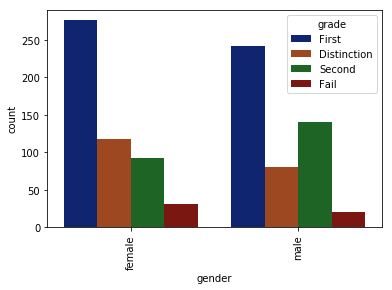

In [55]:
gender_edu = sns.countplot('gender', data= df, hue = 'grade', palette = 'dark')
_ = plt.setp(gender_edu.get_xticklabels(), rotation=90)

##### Conclusion: Both genders have higher number of students who got First division, with females following the above mentioned trend of number of distinction holders followed by Second Division holders, Faliures. However, the male students have higher number of students who attained Second Division and lesser number of Failures than the female students

# Comparing Subjects of Students

## Writing Score Vs. Math Scores

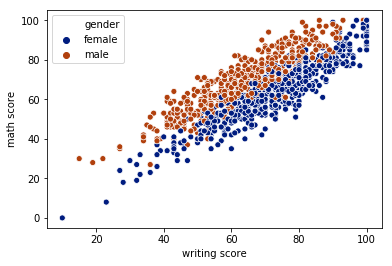

In [58]:
sns.scatterplot( x= 'writing score', y = 'math score', data = df, hue = 'gender', palette = 'dark')

## Writing Score Vs. Reading Score

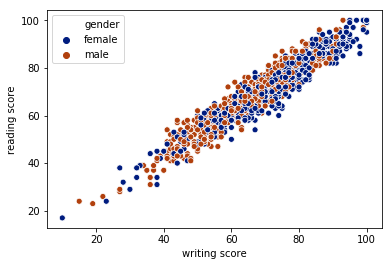

In [60]:
sns.scatterplot(x= 'writing score', y= 'reading score',data = df, hue = 'gender', palette = 'dark')

## Math Score Vs. Reading Score

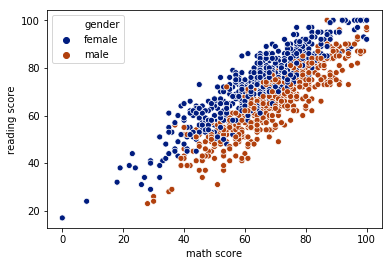

In [62]:
sns.scatterplot(x = 'math score', y='reading score', data = df, hue = 'gender', palette = 'dark')

# Calculating the distributions of the scores achieved in each exam

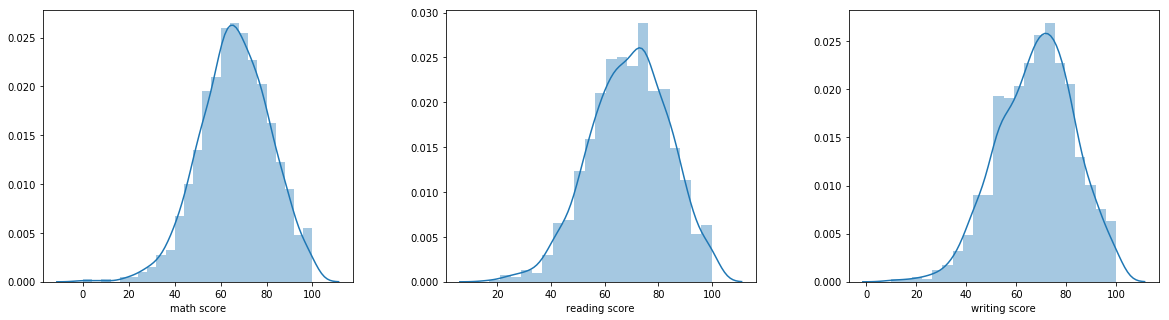

In [65]:
fig, axs = plt.subplots(figsize = (20,5), ncols = 3)
fig.subplots_adjust(wspace = 0.3)

sns.distplot(df['math score'], ax=axs[0])
sns.distplot(df['reading score'], ax=axs[1])
sns.distplot(df['writing score'], ax=axs[2])

# Comparing the ethnicity of students with their Pass/Fail results

In [68]:
students_ethnicity = passed['race/ethnicity']
students_ethni_num = students_ethnicity.value_counts()
students_ethni_num

group C    301
group D    252
group B    177
group E    136
group A     83
Name: race/ethnicity, dtype: int64

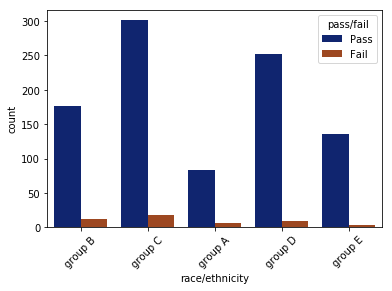

In [73]:
ethni_pass = sns.countplot(x='race/ethnicity', data = df, hue = 'pass/fail',palette = 'dark')
_ = plt.setp(ethni_pass.get_xticklabels(), rotation = 45)

#### Conclusion: The group C has hughest number of passed as well as failed students.

## Checking Which ethnhic group took the test prepatation course the most

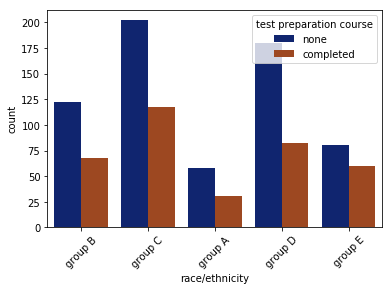

In [76]:
ethni_check = sns.countplot(x = 'race/ethnicity', data = df, hue = 'test preparation course', palette ='dark')
_ = plt.setp(ethni_check.get_xticklabels(), rotation = 45)

#### Conclusion : Group C has the most number of students who completed the test preparation course

## Checking what type of lunch the passed students took most

In [79]:
lunch_type = passed['lunch']
lunch_type_num = lunch_type.value_counts()
lunch_type_num

standard        633
free/reduced    316
Name: lunch, dtype: int64

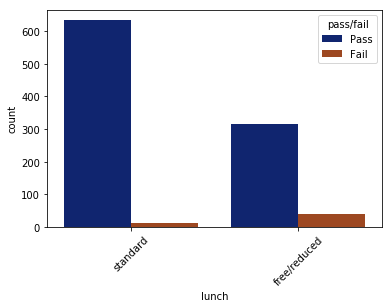

In [80]:
lunch_typ = sns.countplot(x='lunch', data = df, hue = 'pass/fail',palette = 'dark')
_ = plt.setp(lunch_typ.get_xticklabels(), rotation = 45)

#### Conclusion: The passed students took standard lunch more that the Free/reduced lunch. there are less number of failed students who took standard lunch

## Checking the relationship of race/ethnicity with students education

In [82]:
student_race = passed['race/ethnicity']
student_race_num = student_race.value_counts()
student_race_num

group C    301
group D    252
group B    177
group E    136
group A     83
Name: race/ethnicity, dtype: int64

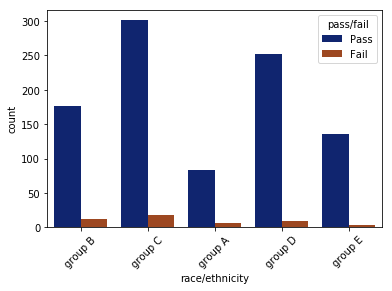

In [83]:
student_race_edu = sns.countplot(x='race/ethnicity', data = df, hue = 'pass/fail',palette = 'dark')
_ = plt.setp(student_race_edu.get_xticklabels(), rotation = 45)

In [84]:
## Checking the relationship of race/ethnicity of students with the type of lunch they take

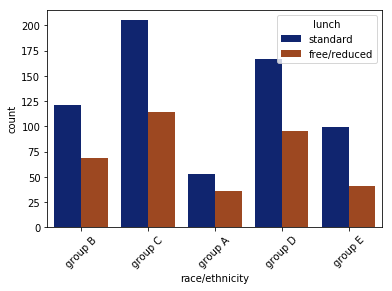

In [85]:
student_lunch = sns.countplot(x='race/ethnicity', data = df, hue = 'lunch',palette = 'dark')
_ = plt.setp(student_lunch.get_xticklabels(), rotation = 45)

#### Conclusion: From the diagram we can assume that all race/ethnic groups have more number of students having standard lunch with Group C having the highest number.

## Checking the relationship of test preparation course with pass/fail results

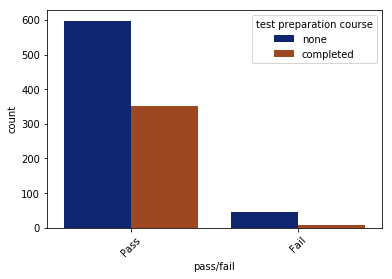

In [90]:
pass_num = sns.countplot(x='pass/fail', data = df, hue = 'test preparation course',palette = 'dark')
_ = plt.setp(pass_num.get_xticklabels(), rotation = 45)

#### Conclusion: From the diagram we can see that the students that did not complete the test preparation couse have a significantly large number of students that passed. while there are larger number of failed students who also completed the test preparation course. its effectiveness should be questioned

### Checking the relationship of test preparation course with parental level of education

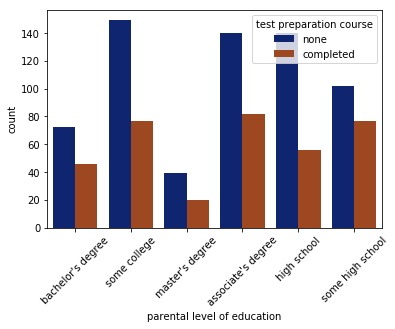

In [94]:
parent_edu = sns.countplot(x='parental level of education', data = df, hue = 'test preparation course',palette = 'dark')
_ = plt.setp(parent_edu.get_xticklabels(), rotation = 45)

#### Conclusion : From the above diagram, we can assume that most parents do not want to give their children the test preparation course regardless of their education level.

## Checking if the passed students took the test preparation course

In [97]:
student_test_passed = passed['test preparation course']
student_test_passed_num = student_test_passed.value_counts()
student_test_passed_num

none         598
completed    351
Name: test preparation course, dtype: int64

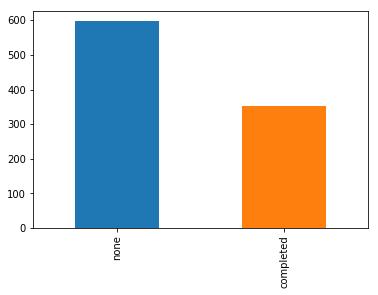

In [98]:
student_test_passed_num.plot.bar()

#### Conclusion: from the above diagram we can assume that most of the students passed even if they did not take the test preparation course/

In [100]:
## Calculating the number of failed students in all subjects

In [103]:
failed_math = df[df['math score']<40]
failed_math_read = failed_math[failed_math['reading score']<40]
failed_math_read_write = failed_math_read[failed_math_read['writing score']<40]
print('Number of students that failed in all subjects: ',len(failed_math_read_write))

Number of students that failed in all subjects:  18


In [104]:
## Calculating number of failed male and female students

In [107]:
fail_male = failed_math_read_write[failed_math_read_write['gender_map']==2]
print('Number of Male students that failed in all subjects: ',len(fail_male))

Number of Male students that failed in all subjects:  7


In [108]:
fail_female = failed_math_read_write[failed_math_read_write['gender_map']==1]
print('Number of Female students that failed in all subjects: ',len(fail_female))

Number of Female students that failed in all subjects:  11


In [109]:
## Calculating the number of male and female students that failed in any one subject

In [110]:
total_fail = df[df['pass/fail']=='Fail']
print('Total Number of failed students: ',len(total_fail))

Total Number of failed students:  51


In [113]:
failed_male = total_fail[total_fail['gender_map']==1]
print('Number of male students that Failed in any one Subject :', len(failed_male))

Number of male students that Failed in any one Subject : 31


In [114]:
failed_female = total_fail[total_fail['gender_map']==2]
print('Number of Female Students that Failed in any one subject :', len(failed_female))

Number of Female Students that Failed in any one subject : 20


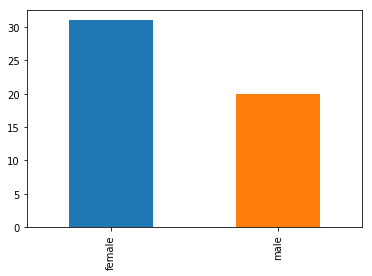

In [117]:
total_failed = total_fail['gender']
total_failed_count = total_failed.value_counts()
total_failed_count.plot.bar()

#### Conclusion: From the above diagram we can assume that there are more female students that failed than male students

## Checking relationship of Failed students and Ethnicity of the students

In [120]:
total_fail_race = total_fail['race/ethnicity']
total_fail_race_num = total_fail_race.value_counts()
total_fail_race_num

group C    18
group B    13
group D    10
group A     6
group E     4
Name: race/ethnicity, dtype: int64

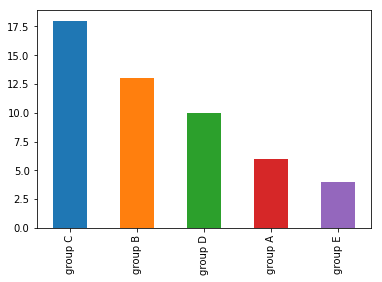

In [121]:
total_fail_race_num.plot.bar()

#### Conclusion: We can see that most number of failed students belong to Group C ethnic group

## Calculating number of students who secured Distinction

In [124]:
distinction = df[df['grade']=='Distinction']
print('Total Number of students who secured Distinction: ',len(distinction))

Total Number of students who secured Distinction:  198


## Calculating the number of male and female students who secured Distinction

In [126]:
distinct_gender = distinction['gender']
distinct_gender_num = distinct_gender.value_counts()
distinct_gender_num

female    118
male       80
Name: gender, dtype: int64

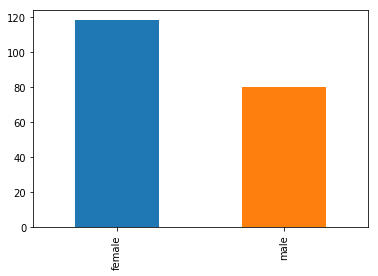

In [127]:
distinct_gender_num.plot.bar()

#### Conclusion : We can assume that there are more number of female studetns that secured distinction than number of male students

## Calculating the number of students who have secured First Division 

In [132]:
first_div = df[df['grade']== 'First']
print('Number of students that secured First Division : ',len(first_div))

Number of students that secured First Division :  517


## Calculating the number of male and female students who secured First division

In [135]:
first_gen = first_div['gender']
first_gen_num = first_gen.value_counts()
first_gen_num

female    276
male      241
Name: gender, dtype: int64

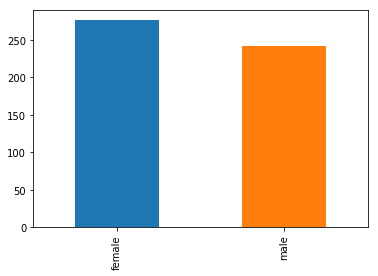

In [136]:
first_gen_num.plot.bar()

#### Conclusion : We can see that there are more number of female students who secured First Division

## Calculating Number of students who secured Second Divison

In [145]:
second_div = df[df['grade']=='Second']
print('Numebr of students that secured Second Division: ',len(second_div))

Numebr of students that secured Second Division:  234


## Calculating number of male and female students who secured Second Division

In [142]:
second_gen = second_div['gender']
second_gen_num = second_gen.value_counts()
second_gen_num

male      141
female     93
Name: gender, dtype: int64

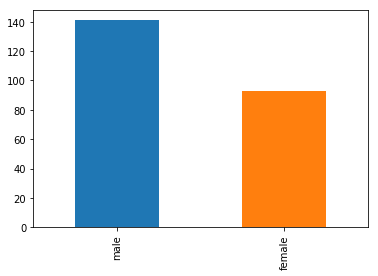

In [143]:
second_gen_num.plot.bar()

#### Conclusion: We can assume that there are more number of male students that secured second division.